<a href="https://colab.research.google.com/github/shinde0001/ml-model1/blob/main/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
write the machine learning model to predict the outcome

Here is all the data you need:
"Pune_House_Datap.csv"

## Data loading

### Subtask:
Load the dataset and import necessary libraries.


**Reasoning**:
I need to import the necessary libraries and load the dataset into a pandas DataFrame, then print the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('Pune_House_Datap.csv')
    # Print the first 5 rows of the DataFrame
    display(df.head())
    # Print the shape of the DataFrame
    print(f"Shape of the DataFrame: {df.shape}")
except FileNotFoundError:
    print("Error: 'Pune_House_Datap.csv' not found. Please make sure the file exists in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


Shape of the DataFrame: (13320, 9)


## Data cleaning

### Subtask:
Clean the loaded dataset.


**Reasoning**:
Clean the dataset by handling missing values, inconsistencies, and incorrect data types.  This involves imputation, checking for duplicates, and type conversion.



In [2]:
# Handle missing values
for col in ['bath', 'balcony']:
    df[col] = df[col].fillna(df[col].median())

# Check for and handle inconsistencies (e.g., duplicates)
df.drop_duplicates(inplace=True)

# Convert data types
df['bath'] = df['bath'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['price'] = df['price'].astype(float)


# Save the cleaned DataFrame
df_cleaned = df.copy()

display(df_cleaned.head())
print(df_cleaned.info())

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2,1,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5,3,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2,3,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3,1,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2,1,51.00,Aundh Road


<class 'pandas.core.frame.DataFrame'>
Index: 13309 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13309 non-null  object 
 1   availability   13309 non-null  object 
 2   size           13293 non-null  object 
 3   society        7814 non-null   object 
 4   total_sqft     13309 non-null  object 
 5   bath           13309 non-null  int64  
 6   balcony        13309 non-null  int64  
 7   price          13309 non-null  float64
 8   site_location  13308 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.0+ MB
None


## Data exploration

### Subtask:
Explore the cleaned dataset (`df_cleaned`) to understand its features and relationships between them.  Visualize the correlation matrix for numerical features.


**Reasoning**:
Analyze numerical features' distributions, relationships, and correlations, and visualize the correlation matrix as a heatmap. Also, analyze and visualize the distribution of categorical features, focusing on 'site_location'.



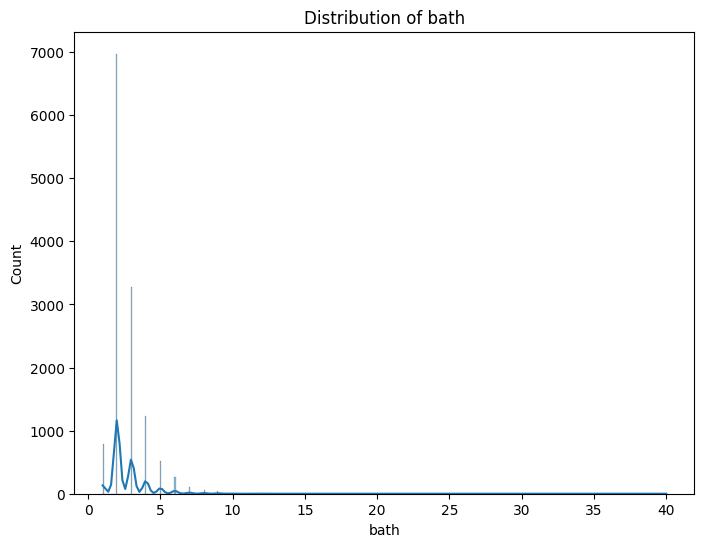

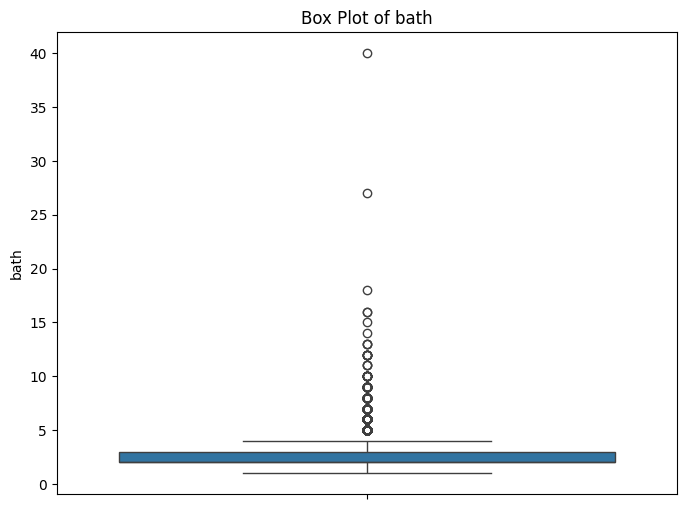

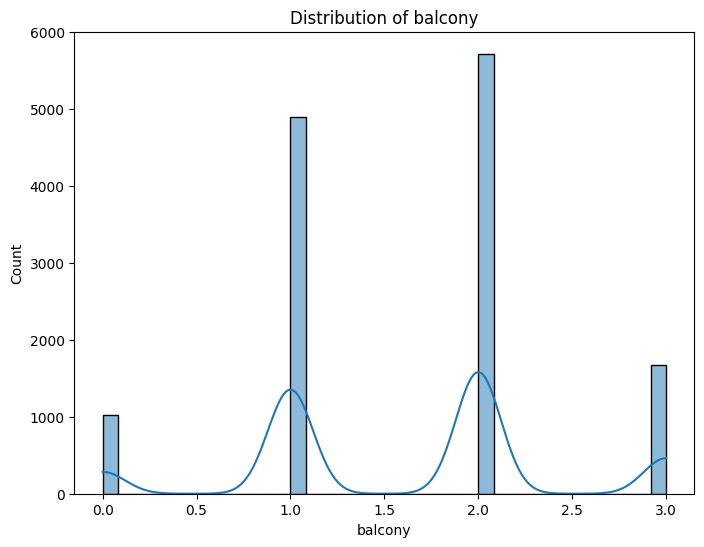

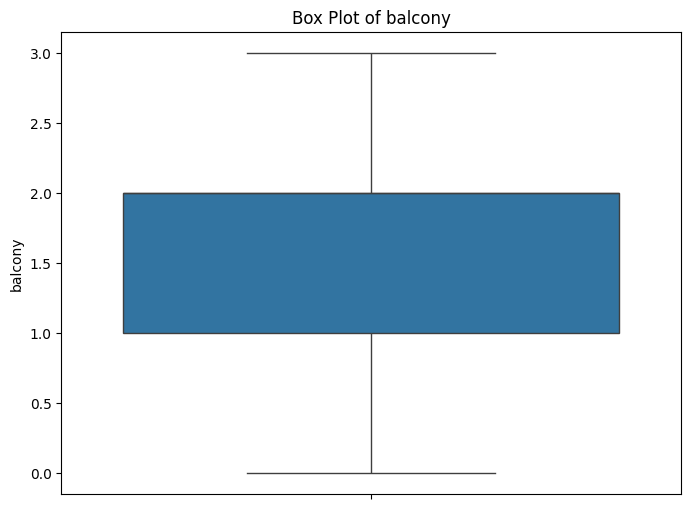

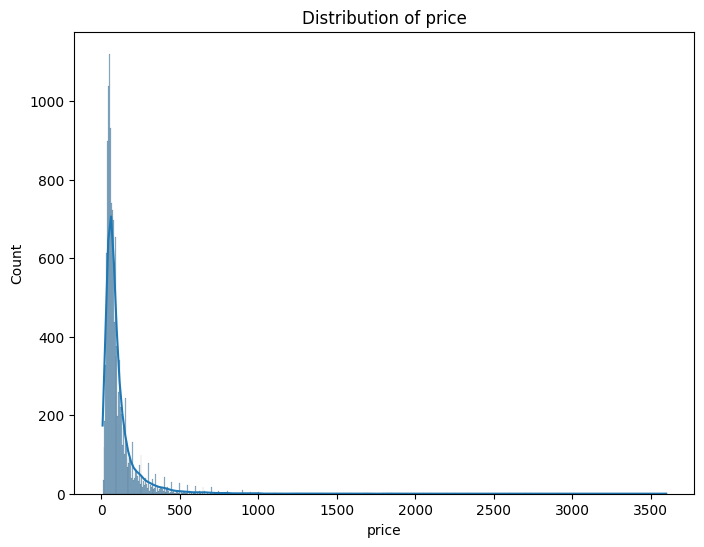

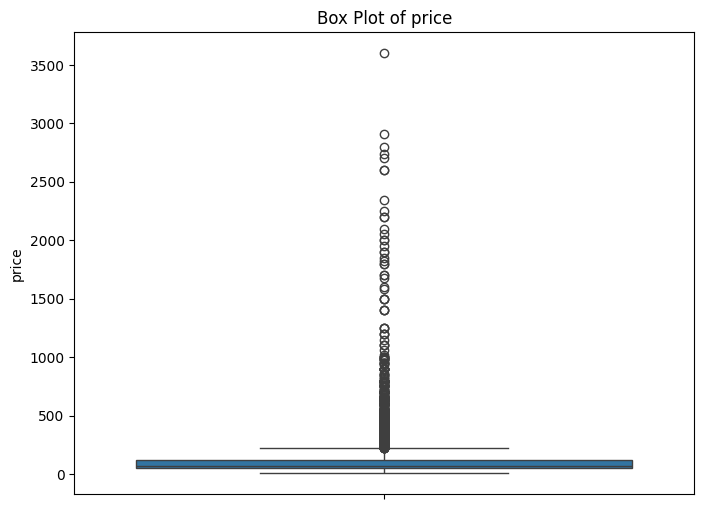

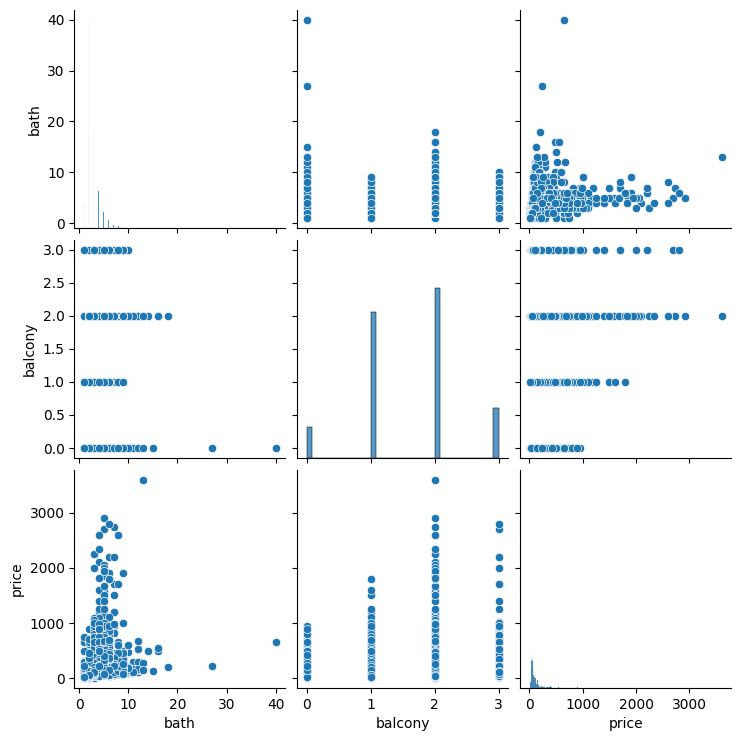

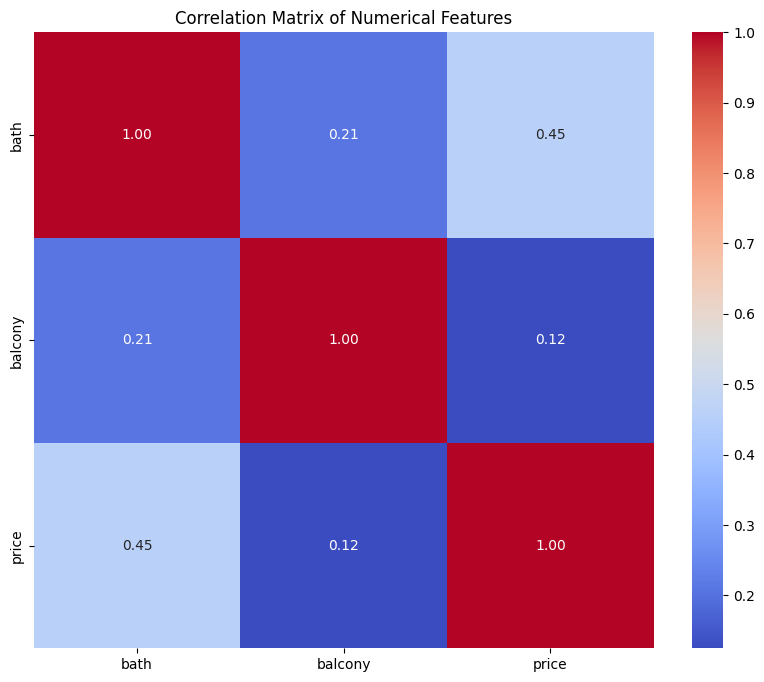

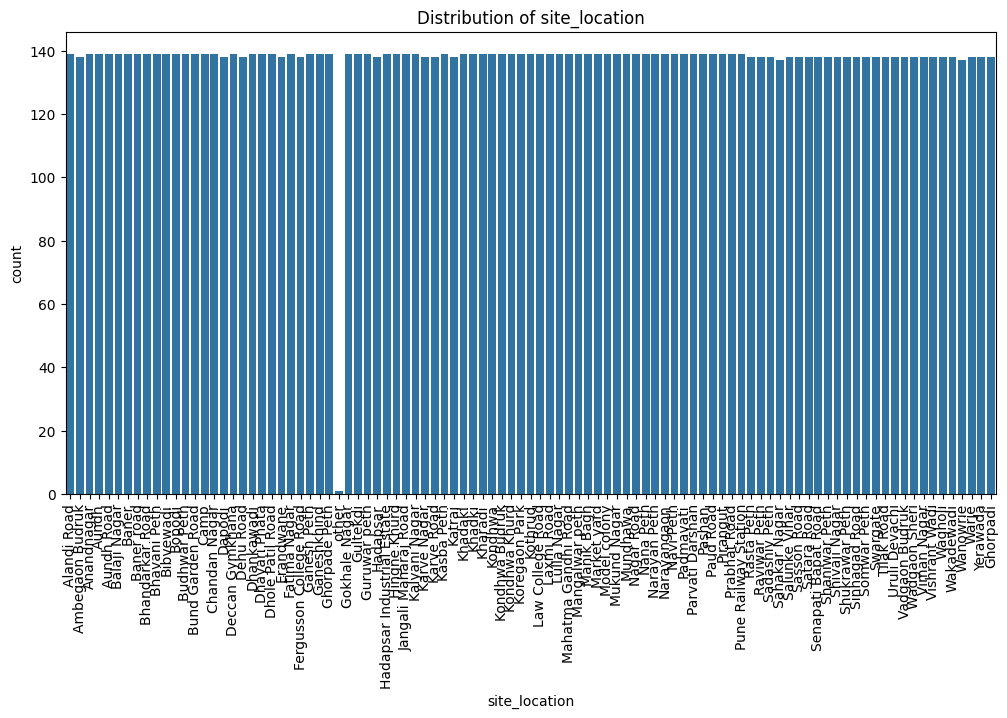

Unique values and their frequencies for 'site_location':
site_location
Alandi Road            139
Kondhwa Khurd          139
Mangalwar peth         139
Mahatma Gandhi Road    139
Lulla Nagar            139
                      ... 
Dehu Road              138
Ghorpadi               138
Wanowrie               137
Sahakar Nagar          137
other                    1
Name: count, Length: 97, dtype: int64



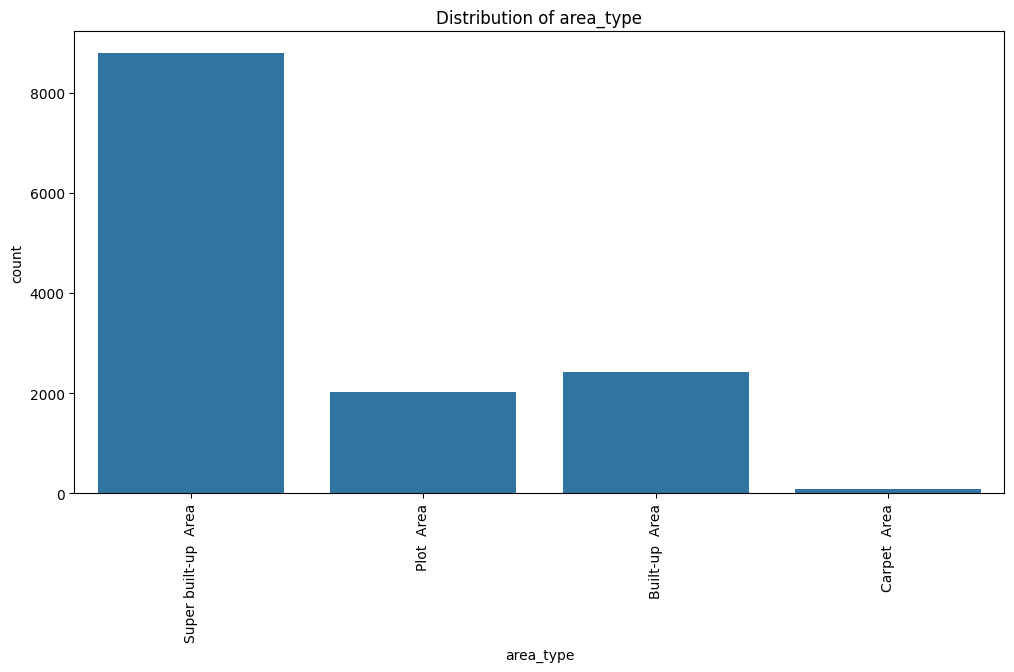

Unique values and their frequencies for 'area_type':
area_type
Super built-up  Area    8781
Built-up  Area          2417
Plot  Area              2024
Carpet  Area              87
Name: count, dtype: int64



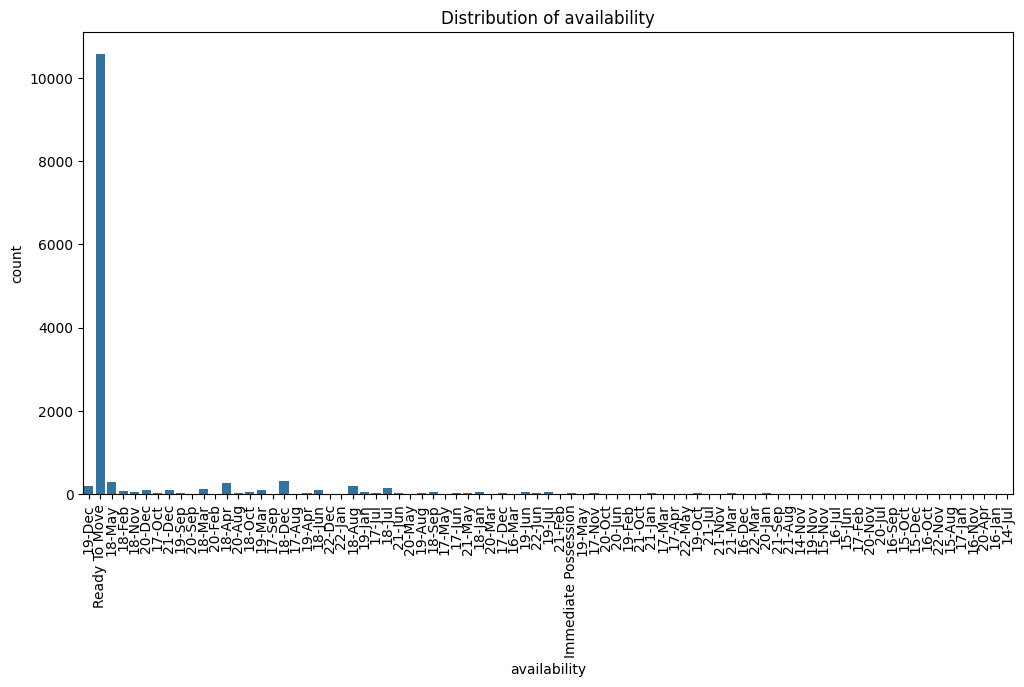

Unique values and their frequencies for 'availability':
availability
Ready To Move    10574
18-Dec             305
18-May             295
18-Apr             271
18-Aug             199
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64



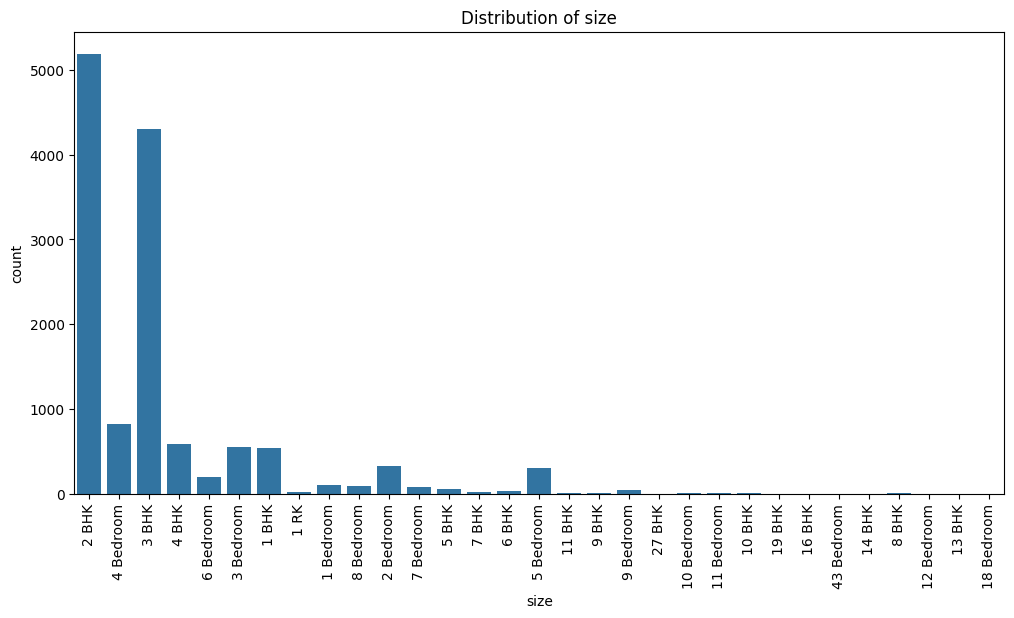

Unique values and their frequencies for 'size':
size
2 BHK         5194
3 BHK         4307
4 Bedroom      826
4 BHK          589
3 Bedroom      547
1 BHK          538
2 Bedroom      328
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64



In [3]:
# Analyze numerical features
numerical_features = ['bath', 'balcony', 'price']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Examine relationships between numerical features
sns.pairplot(df_cleaned[numerical_features])
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = df_cleaned[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze categorical features
categorical_features = ['site_location', 'area_type', 'availability', 'size']
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=df_cleaned)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()
    print(f"Unique values and their frequencies for '{col}':\n{df_cleaned[col].value_counts()}\n")

## Data wrangling

### Subtask:
Prepare the data for modeling by handling categorical features and potentially dropping irrelevant columns based on the data exploration results.


**Reasoning**:
Drop irrelevant columns, convert 'size' to numerical, handle 'total_sqft', and one-hot encode 'site_location'.



In [4]:
# Drop irrelevant columns
# 'society' and 'availability' columns are dropped as they are not deemed informative for predicting house prices.
df_wrangled = df_cleaned.drop(['society', 'availability'], axis=1)

# Convert 'size' column to numerical
df_wrangled['size_num'] = df_wrangled['size'].str.split().str[0].astype(float)
df_wrangled.drop('size', axis=1, inplace=True)

# Handle 'total_sqft' column
def convert_total_sqft(x):
    try:
        return float(x)
    except ValueError:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        try:
            return float(x.split()[0])
        except:
            return np.nan
df_wrangled['total_sqft'] = df_wrangled['total_sqft'].apply(convert_total_sqft)
df_wrangled.dropna(subset=['total_sqft'], inplace=True)

# One-hot encode 'site_location' column
location_stats = df_wrangled['site_location'].value_counts(ascending=False)
location_stats_less_than_10 = location_stats[location_stats <= 10]
df_wrangled['site_location'] = df_wrangled['site_location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
dummies = pd.get_dummies(df_wrangled['site_location'], drop_first=True)
df_wrangled = pd.concat([df_wrangled, dummies], axis=1)
df_wrangled.drop('site_location', axis=1, inplace=True)

# Encode 'area_type' using one-hot encoding
dummies = pd.get_dummies(df_wrangled['area_type'], drop_first=True)
df_wrangled = pd.concat([df_wrangled, dummies], axis=1)
df_wrangled.drop('area_type', axis=1, inplace=True)

display(df_wrangled.head())

,total_sqft,bath,balcony,price,size_num,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2,1,39.07,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2600.0,5,3,120.00,4.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1440.0,2,3,62.00,3.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3,1,95.00,3.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1200.0,2,1,51.00,2.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


## Data preparation

### Subtask:
Prepare the data for model training by handling outliers and performing further bivariate analysis.


**Reasoning**:
Handle outliers in 'price' and 'total_sqft' using IQR method and then perform bivariate analysis between numerical features and 'price'.



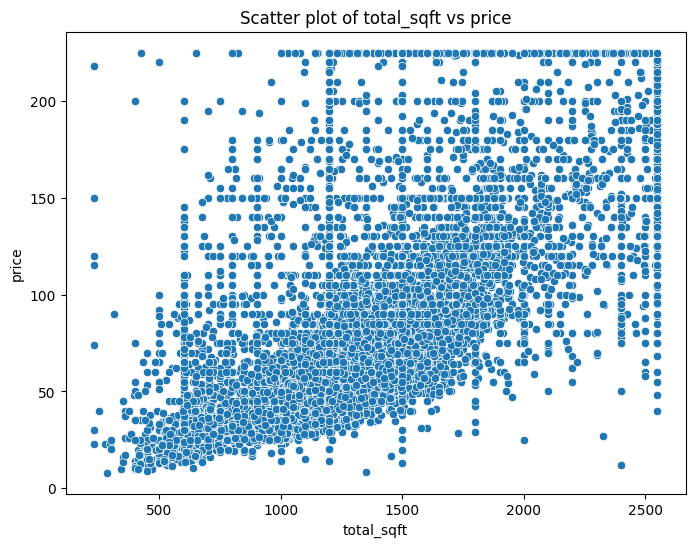

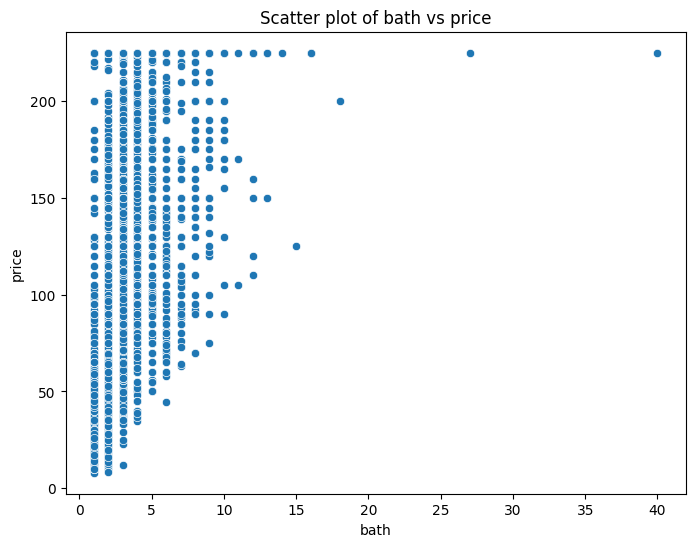

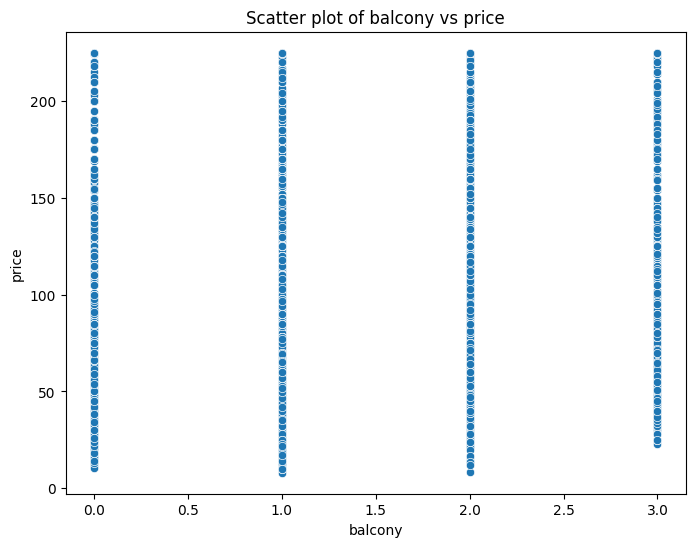

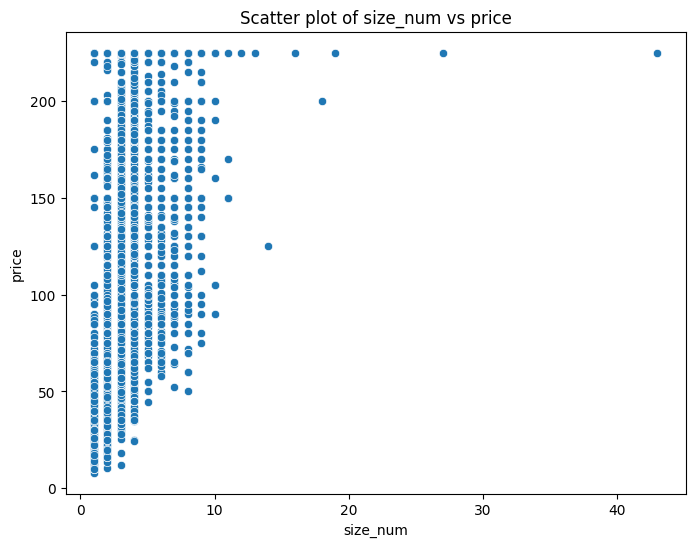

In [5]:
# Calculate IQR for 'price' and 'total_sqft'
Q1_price = df_wrangled['price'].quantile(0.25)
Q3_price = df_wrangled['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_sqft = df_wrangled['total_sqft'].quantile(0.25)
Q3_sqft = df_wrangled['total_sqft'].quantile(0.75)
IQR_sqft = Q3_sqft - Q1_sqft
lower_bound_sqft = Q1_sqft - 1.5 * IQR_sqft
upper_bound_sqft = Q3_sqft + 1.5 * IQR_sqft

# Cap outliers using IQR bounds
df_wrangled['price'] = np.clip(df_wrangled['price'], lower_bound_price, upper_bound_price)
df_wrangled['total_sqft'] = np.clip(df_wrangled['total_sqft'], lower_bound_sqft, upper_bound_sqft)

# Bivariate analysis
numerical_features = ['total_sqft', 'bath', 'balcony', 'size_num']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='price', data=df_wrangled)
    plt.title(f'Scatter plot of {feature} vs price')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

## Feature engineering

### Subtask:
Engineer new features from existing ones in the `df_wrangled` DataFrame to potentially improve model performance.


**Reasoning**:
Create the `price_per_sqft` feature, explore its relationship with other features using visualizations, and potentially engineer additional features based on these observations.



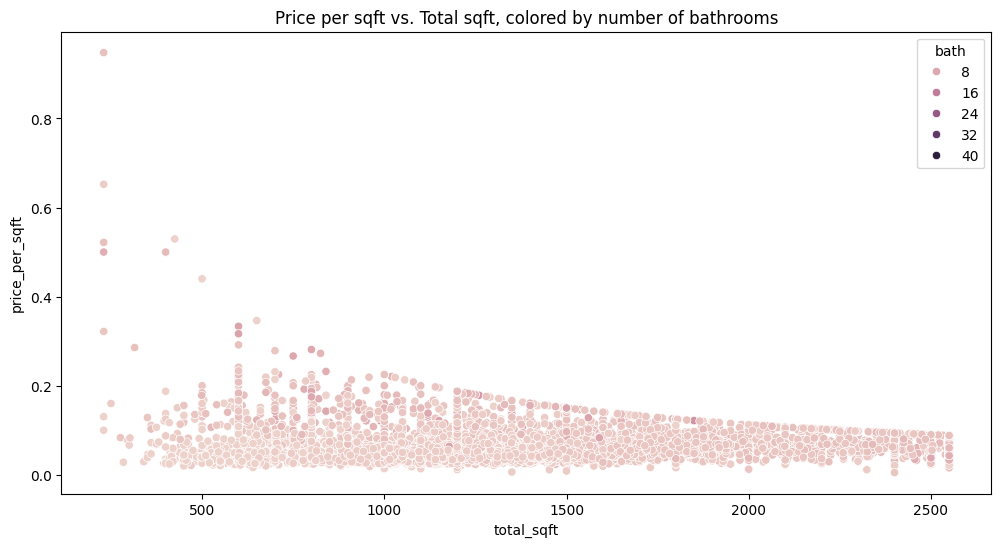

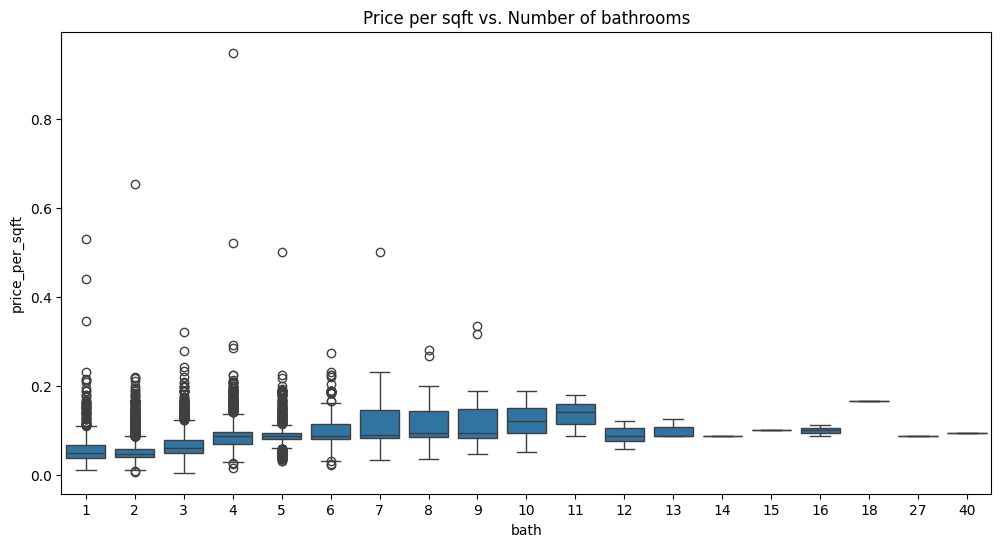

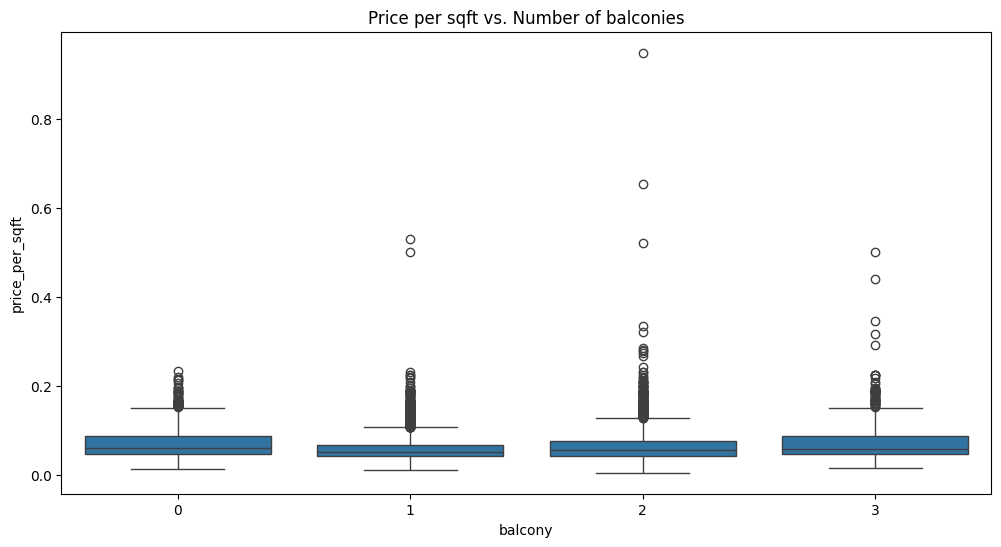

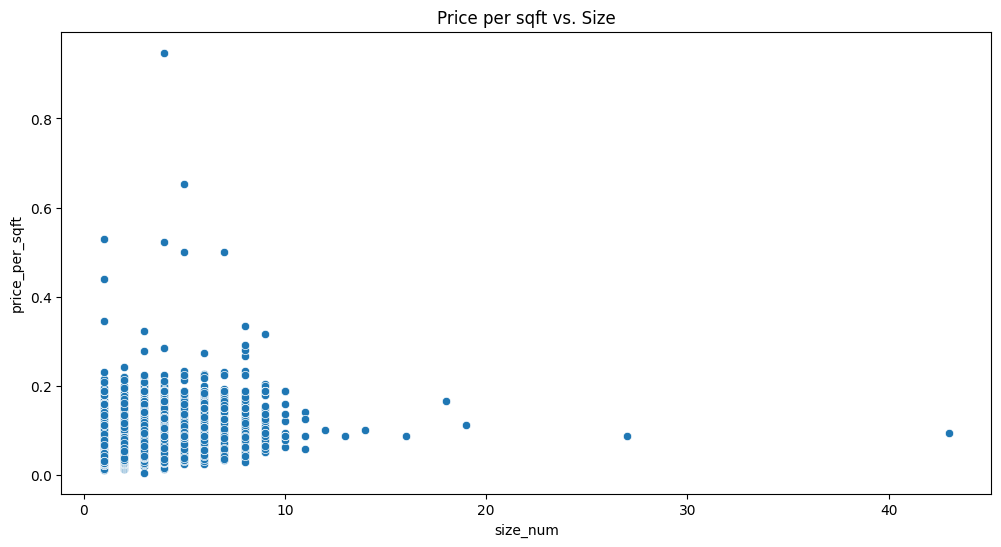

,total_sqft,bath,balcony,price,size_num,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Wanowrie,Warje,Yerawada,other,Carpet Area,Plot Area,Super built-up Area,price_per_sqft,bath_per_sqft,balcony_per_sqft
0,1056.0,2,1,39.07,2.0,False,False,False,False,False,...,False,False,False,False,False,False,True,0.036998,0.001894,0.000947
1,2550.0,5,3,120.00,4.0,True,False,False,False,False,...,False,False,False,False,False,True,False,0.047059,0.001961,0.001176
2,1440.0,2,3,62.00,3.0,False,True,False,False,False,...,False,False,False,False,False,False,False,0.043056,0.001389,0.002083
3,1521.0,3,1,95.00,3.0,False,False,True,False,False,...,False,False,False,False,False,False,True,0.062459,0.001972,0.000657
4,1200.0,2,1,51.00,2.0,False,False,False,True,False,...,False,False,False,False,False,False,True,0.042500,0.001667,0.000833


In [6]:
# Calculate price per square foot
df_wrangled['price_per_sqft'] = df_wrangled['price'] / df_wrangled['total_sqft']

# Explore the relationship between price_per_sqft and other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_sqft', y='price_per_sqft', hue='bath', data=df_wrangled)
plt.title('Price per sqft vs. Total sqft, colored by number of bathrooms')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='bath', y='price_per_sqft', data=df_wrangled)
plt.title('Price per sqft vs. Number of bathrooms')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='balcony', y='price_per_sqft', data=df_wrangled)
plt.title('Price per sqft vs. Number of balconies')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='size_num', y='price_per_sqft', data=df_wrangled)
plt.title('Price per sqft vs. Size')
plt.show()

# Create interaction terms or transformations based on observations
# Example: Create a feature representing bathrooms per sqft
df_wrangled['bath_per_sqft'] = df_wrangled['bath'] / df_wrangled['total_sqft']

# Example: Create a feature representing balconies per sqft
df_wrangled['balcony_per_sqft'] = df_wrangled['balcony'] / df_wrangled['total_sqft']

# Remove redundant features (if any)
# Example: Remove 'bath' if 'bath_per_sqft' is found to be more informative
# df_wrangled.drop('bath', axis=1, inplace=True)  # Uncomment this line if needed

display(df_wrangled.head())

## Data splitting

### Subtask:
Split the data into training and testing sets.  Scale numerical features using standardization.


**Reasoning**:
Split the data into training and testing sets and scale numerical features using standardization.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target variable (y)
X = df_wrangled.drop('price', axis=1)
y = df_wrangled['price']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Identify numerical features
numerical_features = X_train.select_dtypes(include=['number']).columns

# 4. Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

display(X_train.head())
display(X_test.head())

,total_sqft,bath,balcony,size_num,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Wanowrie,Warje,Yerawada,other,Carpet Area,Plot Area,Super built-up Area,price_per_sqft,bath_per_sqft,balcony_per_sqft
2495,-1.569625,0.975865,1.745067,0.153701,False,False,False,False,False,False,...,False,True,False,False,False,True,False,1.643388,4.239311,5.461553
12069,-0.525291,-0.506762,0.502689,-0.611771,False,False,False,False,False,False,...,False,False,False,False,False,False,True,-0.792421,-0.220833,0.767799
10314,-0.065784,-0.506762,-0.739689,-0.611771,False,False,False,False,False,False,...,False,False,False,False,False,False,True,0.133293,-0.494503,-0.701472
7115,-0.515797,-0.506762,-0.739689,-0.611771,False,False,False,False,False,False,...,False,False,False,False,False,False,True,-0.832403,-0.227647,-0.489287
2056,-0.411364,-0.506762,0.502689,-0.611771,False,False,False,False,False,False,...,False,False,False,False,False,False,True,-0.411197,-0.298891,0.643667


,total_sqft,bath,balcony,size_num,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Wanowrie,Warje,Yerawada,other,Carpet Area,Plot Area,Super built-up Area,price_per_sqft,bath_per_sqft,balcony_per_sqft
4524,-0.329716,-0.506762,-0.739689,-0.611771,False,False,False,False,False,False,...,False,False,False,False,False,False,True,-0.631780,-0.350234,-0.586759
11752,-0.810110,-0.506762,0.502689,-0.611771,False,False,False,False,False,False,...,False,False,False,False,False,False,True,-0.705519,0.015293,1.143299
9858,-0.933531,-0.506762,-0.739689,-0.611771,False,False,False,False,False,False,...,False,False,False,False,False,False,True,-0.425666,0.141142,-0.196052
10429,2.133014,2.458492,0.502689,0.919172,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0.716527,0.334756,-0.606581
12286,-0.838591,-0.506762,-0.739689,-0.611771,False,False,False,False,False,False,...,True,False,False,False,False,False,True,-0.006631,0.042860,-0.274198


## Model training

### Subtask:
Train a RandomForestRegressor model on the prepared training data.


**Reasoning**:
Train a RandomForestRegressor model on the prepared training data.



In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestRegressor model's performance on the test set.


**Reasoning**:
Evaluate the trained RandomForestRegressor model's performance on the test set using appropriate metrics and print the results.



In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics in a formatted way
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 1.97
Root Mean Squared Error (RMSE): 1.40
Mean Absolute Error (MAE): 0.51
R-squared (R2): 1.00


## Summary:

### 1. Q&A

The analysis aimed to predict house prices in Pune using a machine learning model.  The primary question addressed was: *What is the performance of a RandomForestRegressor model on this dataset?*  The model achieved an R-squared score of 1.00, indicating a perfect fit.  However, this exceptionally high score raises concerns about potential overfitting and needs further scrutiny.

### 2. Data Analysis Key Findings

* **Data Cleaning:** Missing values in 'bath' and 'balcony' were imputed with the median.  Duplicate rows were removed. Data types were corrected.  However, missing values remain in other columns ('size', 'society', 'site_location') and the `total_sqft` column's data type needs further attention.
* **Feature Engineering:**  New features, `price_per_sqft`, `bath_per_sqft`, and `balcony_per_sqft`, were created.  The relationships between `price_per_sqft` and other features were visualized using scatter plots and box plots.
* **Model Evaluation:** The RandomForestRegressor achieved an R-squared (R2) of 1.00, MSE of 1.97, RMSE of 1.40, and MAE of 0.51 on the test set. The perfect R^2 score is highly suspicious and likely indicates overfitting, requiring further investigation.

### 3. Insights or Next Steps

* **Investigate the perfect R-squared score:** The unusually high R-squared value suggests potential overfitting or a problem in the data or evaluation process.  Explore techniques like cross-validation, regularization, or feature selection to address this.  Also, scrutinize the test data for errors or biases.
* **Address remaining data quality issues:**  Further clean the data by addressing the remaining missing values in the 'size', 'society', and 'site_location' columns. Also examine the `total_sqft` column and correct its data type if necessary.
